Root Mean Squared Error (RMSE): 0.25495097567963926
R-squared (R²): 0.7142857142857143


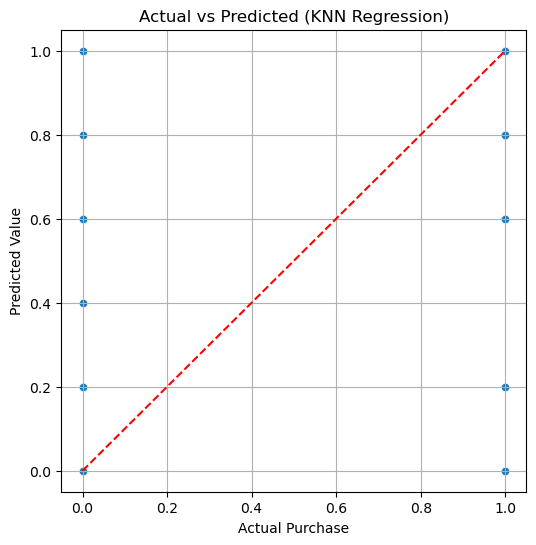

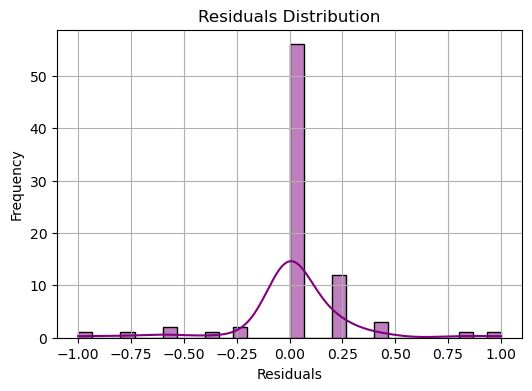

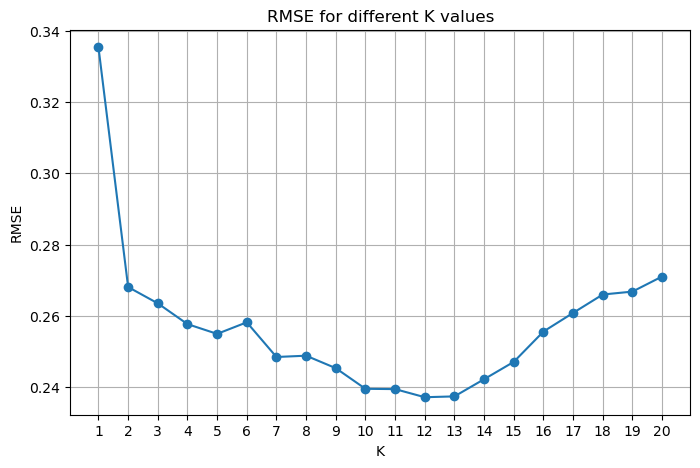

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset
knir = pd.read_csv('D:/TM/Assignment done by me/Mar/29-03-2025/KNN_Project_56/KNN Assignment/iphone_purchase_records.csv')

# Step 2: Preprocessing
knir['Gender'] = knir['Gender'].map({'Male': 1, 'Female': 0})
X = knir[['Gender', 'Age', 'Salary']]
y = knir['Purchase Iphone']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Step 6: Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

# Step 7: Visualizations

# 7.1: Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual Purchase')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted (KNN Regression)')
plt.grid(True)
plt.show()

# 7.2: Residual distribution
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 7.3: RMSE for different K values
rmse_values = []
k_range = range(1, 21)
for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse_values.append(np.sqrt(mean_squared_error(y_test, preds)))

plt.figure(figsize=(8, 5))
plt.plot(k_range, rmse_values, marker='o', linestyle='-')
plt.title('RMSE for different K values')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.xticks(k_range)
plt.grid(True)
plt.show()
